In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
user = 'celia'

In [29]:
df = pd.read_csv('/Users/{}/GitHub/mouse_bandit/celia_session_record.csv'.format(user),index_col=0)
df.head()

,Owner,Session ID,Mouse ID,Date,Phase,Markov,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
0,celia,01112018_Baby,Baby,2018-01-11,2.0,1,0.8,0.2,NaN,NaN,597.0,9.0,431.0,0.88,2.0,1.0,40.0,40.0
1,celia,01122018_Baby,Baby,2018-01-12,2.0,1,0.2,0.8,NaN,NaN,750.0,15.0,542.0,0.86,2.0,1.0,40.0,40.0
2,celia,01152018_Baby,Baby,2018-01-15,2.0,1,0.8,0.2,NaN,NaN,800.0,13.0,591.0,0.88,2.0,1.0,40.0,40.0
3,celia,01172018_Baby,Baby,2018-01-17,2.0,1,0.2,0.8,NaN,NaN,796.0,23.0,558.0,0.84,2.0,1.0,40.0,40.0
4,celia,01192018_Baby,Baby,2018-01-19,2.0,1,0.8,0.2,NaN,NaN,715.0,15.0,498.0,0.83,2.0,1.0,40.0,40.0


In [35]:
#add a condition column to simplify things. It's annoying that 80-20 can have a left reward prob of 0.8 or 0.2

df['condition'] = np.nan

df.loc[((df['Left Reward Prob'] == 0.9) | (df['Left Reward Prob'] == 0.1)),'condition'] = '90-10'
df.loc[((df['Left Reward Prob'] == 0.8) | (df['Left Reward Prob'] == 0.2)),'condition'] = '80-20'
df.loc[((df['Left Reward Prob'] == 0.7) | (df['Left Reward Prob'] == 0.3)),'condition'] = '70-30'

df = df[df['Decision Window Duration']==2.0] # account for the fact that 90-10 is used during training 
df_blocks = df[df["Markov"]==0] 
df_markov = df[df["Markov"]==1]


In [36]:
df.shape

(787, 19)

## Things to look at
* how many sessions for each condition
* how many sessions f(n) of p high port
* distribution of trials (by condition)
* distribution of rewards (by condition)

## how many different mice

In [37]:
df_markov['Mouse ID'].value_counts()

Mustard      110
Raspberry    108
Baby         107
Wine          98
Sky           96
Dill          66
Name: Mouse ID, dtype: int64

In [38]:
df_blocks['Mouse ID'].value_counts()

Dill         37
Raspberry    35
Baby         34
Wine         33
Sky          32
Mustard      31
Name: Mouse ID, dtype: int64

## Number of sessions acquired

In [42]:
print('Condition | # sessions')
df_markov.condition.value_counts()

Condition | # sessions


70-30    234
90-10    175
80-20    175
Name: condition, dtype: int64

In [41]:
print('Condition | # sessions')
df_blocks.condition.value_counts()

Condition | # sessions


90-10    92
80-20    61
70-30    47
Name: condition, dtype: int64

There are 10 100-0 sessions. Let's ignore them for now

In [43]:
df = df_markov.copy()

In [44]:
df = df[~df.condition.isnull()]

(-0.1, 2.65)

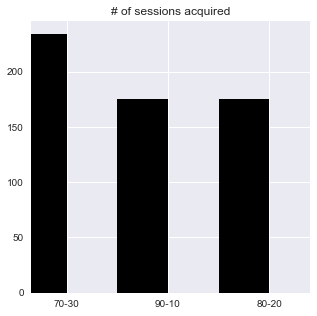

In [45]:
plt.figure(figsize=(5,5))
plt.title('# of sessions acquired')
plt.bar(left = [0,1,2],height = df.condition.value_counts(),width=0.5,color='black')
plt.xticks([0.25,1.25,2.25],df.condition.value_counts().keys())
plt.xlim(-0.1,2.65)

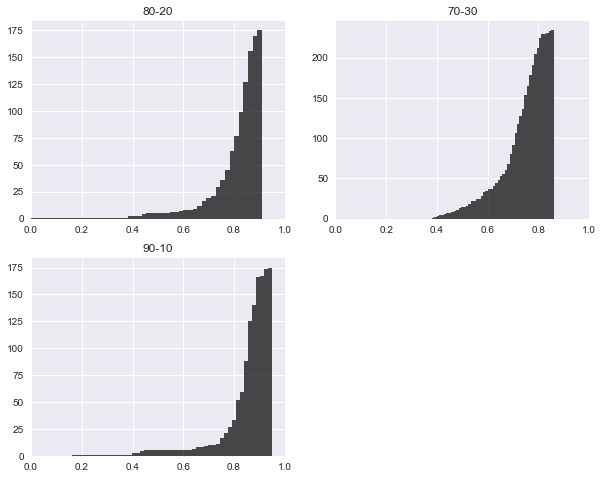

In [46]:
conditions = df.condition.unique()

plt.figure(figsize=(10,8))
i = 1
for condition in conditions:
    
    d = df[df.condition == condition]
    plt.subplot(2,2,i)
    d['p(high Port)'].hist(cumulative=True,bins=50,alpha=0.7,label=condition,normed=False,color='black')
    plt.title(condition)
    #plt.ylim(0,1.05)
    plt.xlim(0,1)
    i+=1

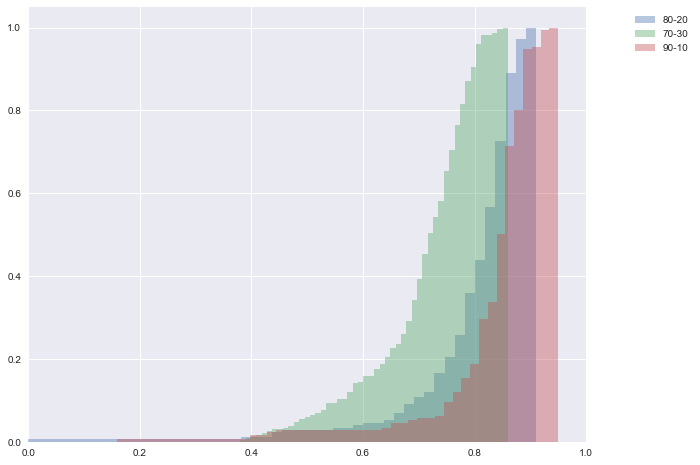

In [47]:
conditions = df.condition.unique()

plt.figure(figsize=(10,8))
i = 1
for condition in conditions:
    
    d = df[df.condition == condition]
    d['p(high Port)'].hist(cumulative=True,bins=50,alpha=0.4,label=condition,normed=True)
    plt.ylim(0,1.05)
    plt.xlim(0,1)
    
plt.legend(bbox_to_anchor = (1.2,1))

In [74]:
df[df['condition']=='80-20']['p(high Port)'].mean()
df[df['condition']=='80-20']['p(high Port)'].std()

for condition in conditions:
        print(condition, df[df['condition']==condition]['p(high Port)'].mean())
        print(condition, df[df['condition']==condition]['p(high Port)'].std())

80-20 0.8002857142857142
80-20 0.10428425218850441
70-30 0.704230769230769
70-30 0.09689407380465292
90-10 0.8321142857142859
90-10 0.09572823465252044


(-0.1, 2.65)

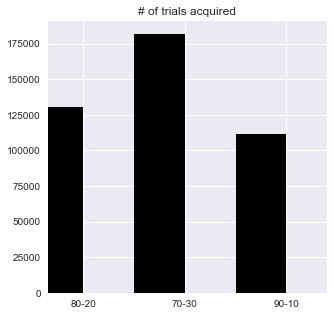

In [48]:
conditions = df.condition.unique()
num_trials = {}
for condition in conditions:
    num_trials[condition] = df[df.condition == condition]['No. Trials'].sum()
    
plt.figure(figsize=(5,5))
plt.title('# of trials acquired')
plt.bar(left = [0,1,2],height = num_trials.values(),width=0.5,color='black')
plt.xticks([0.25,1.25,2.25],num_trials.keys())
plt.xlim(-0.1,2.65)